In [1]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K
from keras_segmentation.models.pspnet import pspnet_50
from keras_segmentation.models.model_utils import transfer_weights

Using TensorFlow backend.


In [9]:
!ls

 Volume in drive C is OS
 Volume Serial Number is 7A94-1164

 Directory of C:\apps\segmentation

11/01/2019  01:11 PM    <DIR>          .
11/01/2019  01:11 PM    <DIR>          ..
11/01/2019  10:28 AM    <DIR>          .ipynb_checkpoints
09/22/2017  07:20 PM    <DIR>          dataset1
11/01/2019  10:30 AM            20,981 Untitled.ipynb
11/01/2019  01:11 PM           182,174 Untitled1.ipynb
               2 File(s)        203,155 bytes
               4 Dir(s)  160,139,116,544 bytes free


In [8]:
type(pretrained_model)

keras.engine.training.Model

In [2]:
pretrained_model = pspnet_50_ADE_20K()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.





In [12]:
pretrained_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 473, 473, 3)  0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
____________________________________________________________________________________________

conv3_3_1x1_increase (Conv2D)   (None, 60, 60, 512)  65536       activation_21[0][0]              
__________________________________________________________________________________________________
conv3_3_1x1_increase_bn (BatchN (None, 60, 60, 512)  2048        conv3_3_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_6 (Add)                     (None, 60, 60, 512)  0           conv3_3_1x1_increase_bn[0][0]    
                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 60, 60, 512)  0           add_6[0][0]                      
__________________________________________________________________________________________________
conv3_4_1x1_reduce (Conv2D)     (None, 60, 60, 128)  65536       activation_22[0][0]              
__________

__________________________________________________________________________________________________
conv4_6_1x1_increase (Conv2D)   (None, 60, 60, 1024) 262144      activation_42[0][0]              
__________________________________________________________________________________________________
conv4_6_1x1_increase_bn (BatchN (None, 60, 60, 1024) 4096        conv4_6_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_13 (Add)                    (None, 60, 60, 1024) 0           conv4_6_1x1_increase_bn[0][0]    
                                                                 activation_40[0][0]              
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 60, 60, 1024) 0           add_13[0][0]                     
__________________________________________________________________________________________________
conv5_1_1x

In [13]:
new_model = pspnet_50( n_classes=51 )

In [14]:
new_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 473, 473, 3)  0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_3[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_117 (Activation)     (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
____________________________________________________________________________________________

conv3_3_1x1_increase (Conv2D)   (None, 60, 60, 512)  65536       activation_137[0][0]             
__________________________________________________________________________________________________
conv3_3_1x1_increase_bn (BatchN (None, 60, 60, 512)  2048        conv3_3_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_38 (Add)                    (None, 60, 60, 512)  0           conv3_3_1x1_increase_bn[0][0]    
                                                                 activation_135[0][0]             
__________________________________________________________________________________________________
activation_138 (Activation)     (None, 60, 60, 512)  0           add_38[0][0]                     
__________________________________________________________________________________________________
conv3_4_1x1_reduce (Conv2D)     (None, 60, 60, 128)  65536       activation_138[0][0]             
__________

__________________________________________________________________________________________________
conv4_6_1x1_increase (Conv2D)   (None, 60, 60, 1024) 262144      activation_158[0][0]             
__________________________________________________________________________________________________
conv4_6_1x1_increase_bn (BatchN (None, 60, 60, 1024) 4096        conv4_6_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_45 (Add)                    (None, 60, 60, 1024) 0           conv4_6_1x1_increase_bn[0][0]    
                                                                 activation_156[0][0]             
__________________________________________________________________________________________________
activation_159 (Activation)     (None, 60, 60, 1024) 0           add_45[0][0]                     
__________________________________________________________________________________________________
conv5_1_1x

In [15]:
transfer_weights( pretrained_model , new_model)

Copying weights 


225it [01:19,  2.84it/s]


Copied weights of 120 layers and skipped 1 layers


In [16]:
for i in new_model.layers:
    i.trainable = False

In [18]:
new_model.layers[-4:]

In [19]:
for i in new_model.layers[-4:]:
    i.trainable = True

In [20]:
new_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 473, 473, 3)  0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_3[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_117 (Activation)     (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
____________________________________________________________________________________________

conv3_3_1x1_increase (Conv2D)   (None, 60, 60, 512)  65536       activation_137[0][0]             
__________________________________________________________________________________________________
conv3_3_1x1_increase_bn (BatchN (None, 60, 60, 512)  2048        conv3_3_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_38 (Add)                    (None, 60, 60, 512)  0           conv3_3_1x1_increase_bn[0][0]    
                                                                 activation_135[0][0]             
__________________________________________________________________________________________________
activation_138 (Activation)     (None, 60, 60, 512)  0           add_38[0][0]                     
__________________________________________________________________________________________________
conv3_4_1x1_reduce (Conv2D)     (None, 60, 60, 128)  65536       activation_138[0][0]             
__________

__________________________________________________________________________________________________
conv4_6_1x1_increase (Conv2D)   (None, 60, 60, 1024) 262144      activation_158[0][0]             
__________________________________________________________________________________________________
conv4_6_1x1_increase_bn (BatchN (None, 60, 60, 1024) 4096        conv4_6_1x1_increase[0][0]       
__________________________________________________________________________________________________
add_45 (Add)                    (None, 60, 60, 1024) 0           conv4_6_1x1_increase_bn[0][0]    
                                                                 activation_156[0][0]             
__________________________________________________________________________________________________
activation_159 (Activation)     (None, 60, 60, 1024) 0           add_45[0][0]                     
__________________________________________________________________________________________________
conv5_1_1x

In [21]:
new_model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/", epochs=5
)

Verifying training dataset


100%|███████████████████████████████████████████████████████████████████████████████| 367/367 [00:01<00:00, 235.80it/s]


Dataset verified! 
Starting Epoch  0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1


170/512 [========>.....................] - ETA: 2:41:09 - loss: 4.6006 - accuracy: 0.035 - ETA: 2:08:18 - loss: 4.3377 - accuracy: 0.038 - ETA: 1:57:03 - loss: 4.0024 - accuracy: 0.073 - ETA: 1:51:21 - loss: 3.7998 - accuracy: 0.088 - ETA: 1:48:00 - loss: 3.6291 - accuracy: 0.108 - ETA: 1:45:44 - loss: 3.4299 - accuracy: 0.154 - ETA: 1:44:11 - loss: 3.2689 - accuracy: 0.190 - ETA: 1:42:57 - loss: 3.1409 - accuracy: 0.213 - ETA: 1:41:50 - loss: 3.0173 - accuracy: 0.237 - ETA: 1:40:56 - loss: 2.9103 - accuracy: 0.266 - ETA: 1:40:16 - loss: 2.7880 - accuracy: 0.299 - ETA: 1:39:38 - loss: 2.6891 - accuracy: 0.321 - ETA: 1:39:02 - loss: 2.6036 - accuracy: 0.339 - ETA: 1:38:29 - loss: 2.5149 - accuracy: 0.360 - ETA: 1:37:59 - loss: 2.4294 - accuracy: 0.385 - ETA: 1:37:36 - loss: 2.3539 - accuracy: 0.402 - ETA: 1:37:13 - loss: 2.2819 - accuracy: 0.422 - ETA: 1:36:54 - loss: 2.2343 - accuracy: 0.434 - ETA: 1:36:36 - loss: 2.1862 - accuracy: 0.444 - ETA: 1:36:24 - loss: 2.1338 - accuracy: 0.454

512/512 [==============================] - ETA: 31:09 - loss: 0.6658 - accuracy: 0.805 - ETA: 30:57 - loss: 0.6654 - accuracy: 0.805 - ETA: 30:46 - loss: 0.6644 - accuracy: 0.805 - ETA: 30:34 - loss: 0.6640 - accuracy: 0.805 - ETA: 30:23 - loss: 0.6635 - accuracy: 0.805 - ETA: 30:12 - loss: 0.6627 - accuracy: 0.805 - ETA: 30:00 - loss: 0.6618 - accuracy: 0.806 - ETA: 29:49 - loss: 0.6618 - accuracy: 0.806 - ETA: 29:37 - loss: 0.6610 - accuracy: 0.806 - ETA: 29:26 - loss: 0.6611 - accuracy: 0.806 - ETA: 29:15 - loss: 0.6600 - accuracy: 0.806 - ETA: 29:03 - loss: 0.6592 - accuracy: 0.806 - ETA: 28:52 - loss: 0.6585 - accuracy: 0.807 - ETA: 28:40 - loss: 0.6577 - accuracy: 0.807 - ETA: 28:29 - loss: 0.6567 - accuracy: 0.807 - ETA: 28:18 - loss: 0.6557 - accuracy: 0.807 - ETA: 28:06 - loss: 0.6556 - accuracy: 0.807 - ETA: 27:55 - loss: 0.6547 - accuracy: 0.808 - ETA: 27:43 - loss: 0.6546 - accuracy: 0.807 - ETA: 27:32 - loss: 0.6539 - accuracy: 0.808 - ETA: 27:20 - loss: 0.6534 - accuracy:

170/512 [========>.....................] - ETA: 1:47:40 - loss: 0.4166 - accuracy: 0.860 - ETA: 1:42:10 - loss: 0.4358 - accuracy: 0.856 - ETA: 1:40:19 - loss: 0.4236 - accuracy: 0.861 - ETA: 1:39:32 - loss: 0.4047 - accuracy: 0.865 - ETA: 1:38:46 - loss: 0.4207 - accuracy: 0.862 - ETA: 1:38:16 - loss: 0.4105 - accuracy: 0.864 - ETA: 1:37:44 - loss: 0.4184 - accuracy: 0.860 - ETA: 1:37:24 - loss: 0.4263 - accuracy: 0.858 - ETA: 1:37:05 - loss: 0.4171 - accuracy: 0.862 - ETA: 1:36:46 - loss: 0.4124 - accuracy: 0.863 - ETA: 1:36:30 - loss: 0.4051 - accuracy: 0.866 - ETA: 1:36:24 - loss: 0.4252 - accuracy: 0.861 - ETA: 1:36:12 - loss: 0.4231 - accuracy: 0.862 - ETA: 1:36:00 - loss: 0.4152 - accuracy: 0.866 - ETA: 1:35:42 - loss: 0.4292 - accuracy: 0.863 - ETA: 1:35:24 - loss: 0.4265 - accuracy: 0.864 - ETA: 1:35:05 - loss: 0.4338 - accuracy: 0.862 - ETA: 1:34:53 - loss: 0.4334 - accuracy: 0.859 - ETA: 1:34:39 - loss: 0.4239 - accuracy: 0.863 - ETA: 1:34:27 - loss: 0.4206 - accuracy: 0.864

512/512 [==============================] - ETA: 31:13 - loss: 0.4245 - accuracy: 0.862 - ETA: 31:02 - loss: 0.4241 - accuracy: 0.862 - ETA: 30:50 - loss: 0.4247 - accuracy: 0.862 - ETA: 30:39 - loss: 0.4246 - accuracy: 0.862 - ETA: 30:27 - loss: 0.4247 - accuracy: 0.862 - ETA: 30:16 - loss: 0.4246 - accuracy: 0.862 - ETA: 30:04 - loss: 0.4254 - accuracy: 0.862 - ETA: 29:53 - loss: 0.4260 - accuracy: 0.862 - ETA: 29:41 - loss: 0.4257 - accuracy: 0.862 - ETA: 29:30 - loss: 0.4257 - accuracy: 0.862 - ETA: 29:18 - loss: 0.4263 - accuracy: 0.862 - ETA: 29:07 - loss: 0.4261 - accuracy: 0.862 - ETA: 28:55 - loss: 0.4258 - accuracy: 0.862 - ETA: 28:44 - loss: 0.4256 - accuracy: 0.862 - ETA: 28:32 - loss: 0.4257 - accuracy: 0.862 - ETA: 28:21 - loss: 0.4256 - accuracy: 0.862 - ETA: 28:10 - loss: 0.4252 - accuracy: 0.862 - ETA: 27:58 - loss: 0.4254 - accuracy: 0.862 - ETA: 27:47 - loss: 0.4252 - accuracy: 0.862 - ETA: 27:35 - loss: 0.4248 - accuracy: 0.862 - ETA: 27:24 - loss: 0.4246 - accuracy:

170/512 [========>.....................] - ETA: 1:45:59 - loss: 0.3640 - accuracy: 0.887 - ETA: 1:41:29 - loss: 0.3523 - accuracy: 0.893 - ETA: 1:40:10 - loss: 0.3387 - accuracy: 0.894 - ETA: 1:38:40 - loss: 0.3648 - accuracy: 0.885 - ETA: 1:37:43 - loss: 0.3825 - accuracy: 0.880 - ETA: 1:36:55 - loss: 0.3718 - accuracy: 0.884 - ETA: 1:36:08 - loss: 0.3669 - accuracy: 0.886 - ETA: 1:35:33 - loss: 0.3511 - accuracy: 0.891 - ETA: 1:35:05 - loss: 0.3650 - accuracy: 0.885 - ETA: 1:34:46 - loss: 0.3928 - accuracy: 0.875 - ETA: 1:34:27 - loss: 0.3999 - accuracy: 0.873 - ETA: 1:34:08 - loss: 0.3990 - accuracy: 0.873 - ETA: 1:33:48 - loss: 0.4173 - accuracy: 0.867 - ETA: 1:33:35 - loss: 0.4378 - accuracy: 0.860 - ETA: 1:33:18 - loss: 0.4316 - accuracy: 0.861 - ETA: 1:32:59 - loss: 0.4317 - accuracy: 0.860 - ETA: 1:32:47 - loss: 0.4384 - accuracy: 0.858 - ETA: 1:32:33 - loss: 0.4328 - accuracy: 0.860 - ETA: 1:32:18 - loss: 0.4284 - accuracy: 0.862 - ETA: 1:32:06 - loss: 0.4255 - accuracy: 0.863

351/512 [===================>..........] - ETA: 31:21 - loss: 0.3949 - accuracy: 0.871 - ETA: 31:10 - loss: 0.3954 - accuracy: 0.871 - ETA: 30:59 - loss: 0.3952 - accuracy: 0.871 - ETA: 30:48 - loss: 0.3949 - accuracy: 0.8712

KeyboardInterrupt: 

In [22]:
!ls

 Volume in drive C is OS
 Volume Serial Number is 7A94-1164

 Directory of C:\apps\segmentation

11/01/2019  05:45 PM    <DIR>          .
11/01/2019  05:45 PM    <DIR>          ..
11/01/2019  04:36 PM    <DIR>          .ipynb_checkpoints
09/22/2017  07:20 PM    <DIR>          dataset1
11/01/2019  05:45 PM           230,956 pspnet_50_train.ipynb
11/01/2019  03:15 PM    <DIR>          tmp
11/01/2019  03:16 PM            21,834 Untitled.ipynb
11/01/2019  04:34 PM                72 Untitled2.ipynb
               3 File(s)        252,862 bytes
               5 Dir(s)  159,942,717,440 bytes free


In [23]:
new_model.save('pspnet_50.h5')

In [24]:
!ls

 Volume in drive C is OS
 Volume Serial Number is 7A94-1164

 Directory of C:\apps\segmentation

11/01/2019  05:48 PM    <DIR>          .
11/01/2019  05:48 PM    <DIR>          ..
11/01/2019  04:36 PM    <DIR>          .ipynb_checkpoints
09/22/2017  07:20 PM    <DIR>          dataset1
11/01/2019  05:48 PM       187,960,272 pspnet_50.h5
11/01/2019  05:47 PM           242,468 pspnet_50_train.ipynb
11/01/2019  03:15 PM    <DIR>          tmp
11/01/2019  03:16 PM            21,834 Untitled.ipynb
11/01/2019  04:34 PM                72 Untitled2.ipynb
               4 File(s)    188,224,646 bytes
               5 Dir(s)  159,754,686,464 bytes free


In [25]:
out = new_model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="out.png"
)

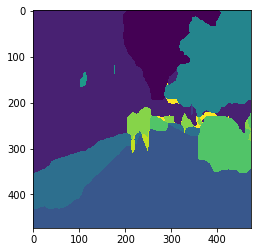

In [27]:
import matplotlib.pyplot as plt
plt.imshow(out)

In [29]:
# evaluating the model
print(new_model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/" , annotations_dir="dataset1/annotations_prepped_test/" ))

101it [07:46,  4.61s/it]


{'frequency_weighted_IU': 0.7874489358062977, 'mean_IU': 0.12051682462747976, 'class_wise_IU': array([0.89717845, 0.8422267 , 0.08687355, 0.89951006, 0.66602251,
       0.83728578, 0.29996345, 0.05891924, 0.78528028, 0.2319913 ,
       0.3365503 , 0.20455644, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}
